In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\ancha\\Downloads\\train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

In [6]:
min(df.isnull().sum())

0

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


<Axes: >

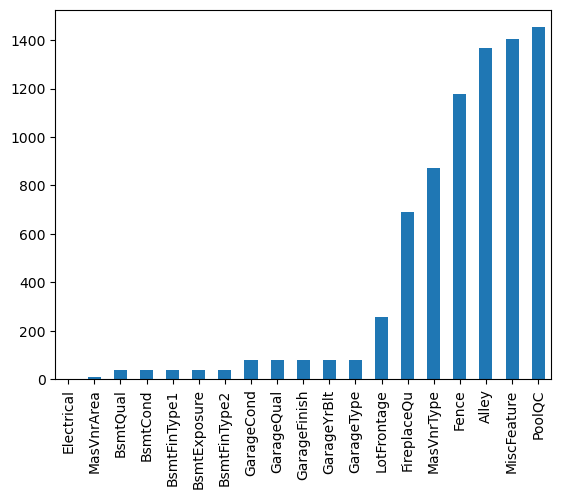

In [7]:
missing=df.isnull().sum()
missing=missing[missing>0]
print(missing)
missing.sort_values(inplace=True)
missing.plot.bar()

C:\Users\ancha\AppData\Local\Temp\ipykernel_10948\3156070661.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'],kde=False,bins=20);


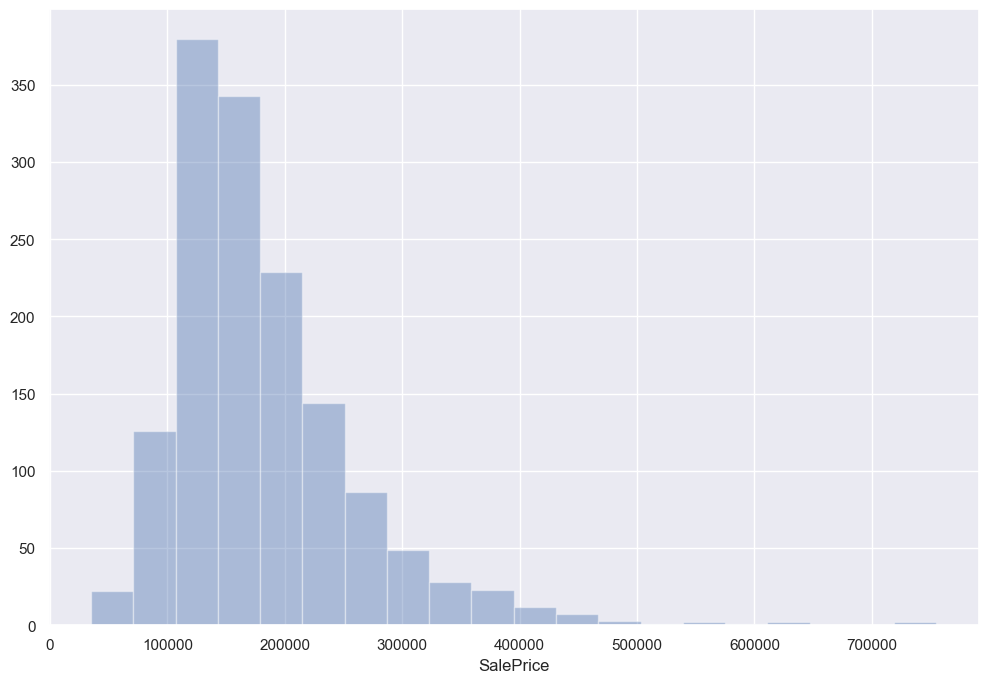

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['SalePrice'],kde=False,bins=20);

<Axes: xlabel='SalePrice', ylabel='Density'>

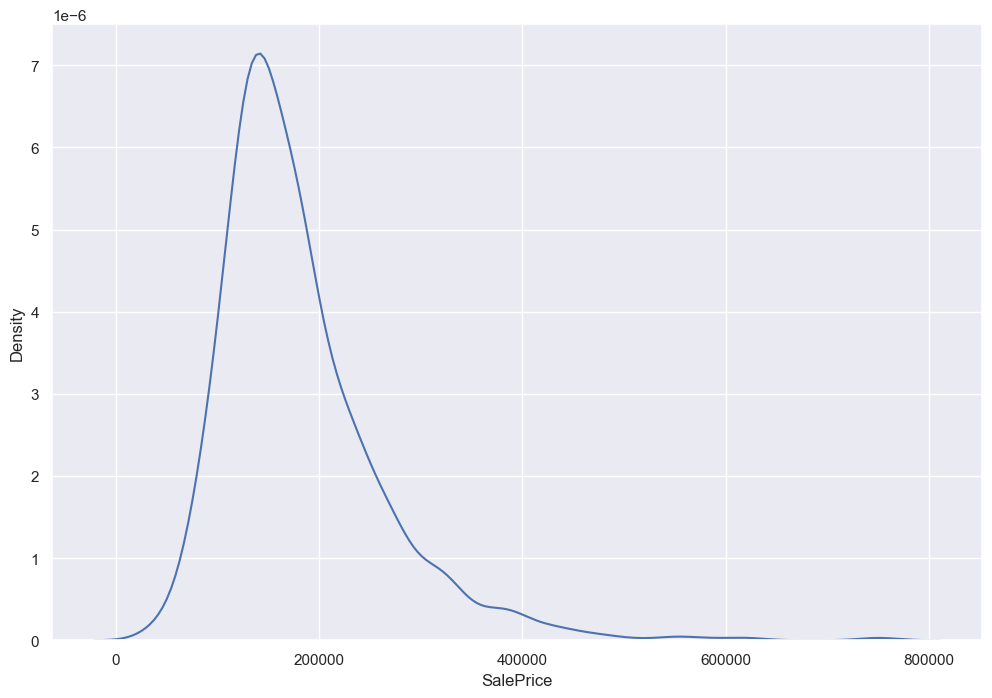

In [9]:
sns.kdeplot(df['SalePrice'])

In [10]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
#to find correlation so we will draw a heat map it will give good correlated features
#ordinal and nominal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
categorical_features=df.select_dtypes(include=[object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
correlation=numeric_features.corr()
coer=correlation['SalePrice'].sort_values(ascending=False),'\n'
coer

(SalePrice        1.000000
 OverallQual      0.790982
 GrLivArea        0.708624
 GarageCars       0.640409
 GarageArea       0.623431
 TotalBsmtSF      0.613581
 1stFlrSF         0.605852
 FullBath         0.560664
 TotRmsAbvGrd     0.533723
 YearBuilt        0.522897
 YearRemodAdd     0.507101
 GarageYrBlt      0.486362
 MasVnrArea       0.477493
 Fireplaces       0.466929
 BsmtFinSF1       0.386420
 LotFrontage      0.351799
 WoodDeckSF       0.324413
 2ndFlrSF         0.319334
 OpenPorchSF      0.315856
 HalfBath         0.284108
 LotArea          0.263843
 BsmtFullBath     0.227122
 BsmtUnfSF        0.214479
 BedroomAbvGr     0.168213
 ScreenPorch      0.111447
 PoolArea         0.092404
 MoSold           0.046432
 3SsnPorch        0.044584
 BsmtFinSF2      -0.011378
 BsmtHalfBath    -0.016844
 MiscVal         -0.021190
 Id              -0.021917
 LowQualFinSF    -0.025606
 YrSold          -0.028923
 OverallCond     -0.077856
 MSSubClass      -0.084284
 EnclosedPorch   -0.128578
 

<Axes: title={'center': 'correlation of numerical features with sale price'}>

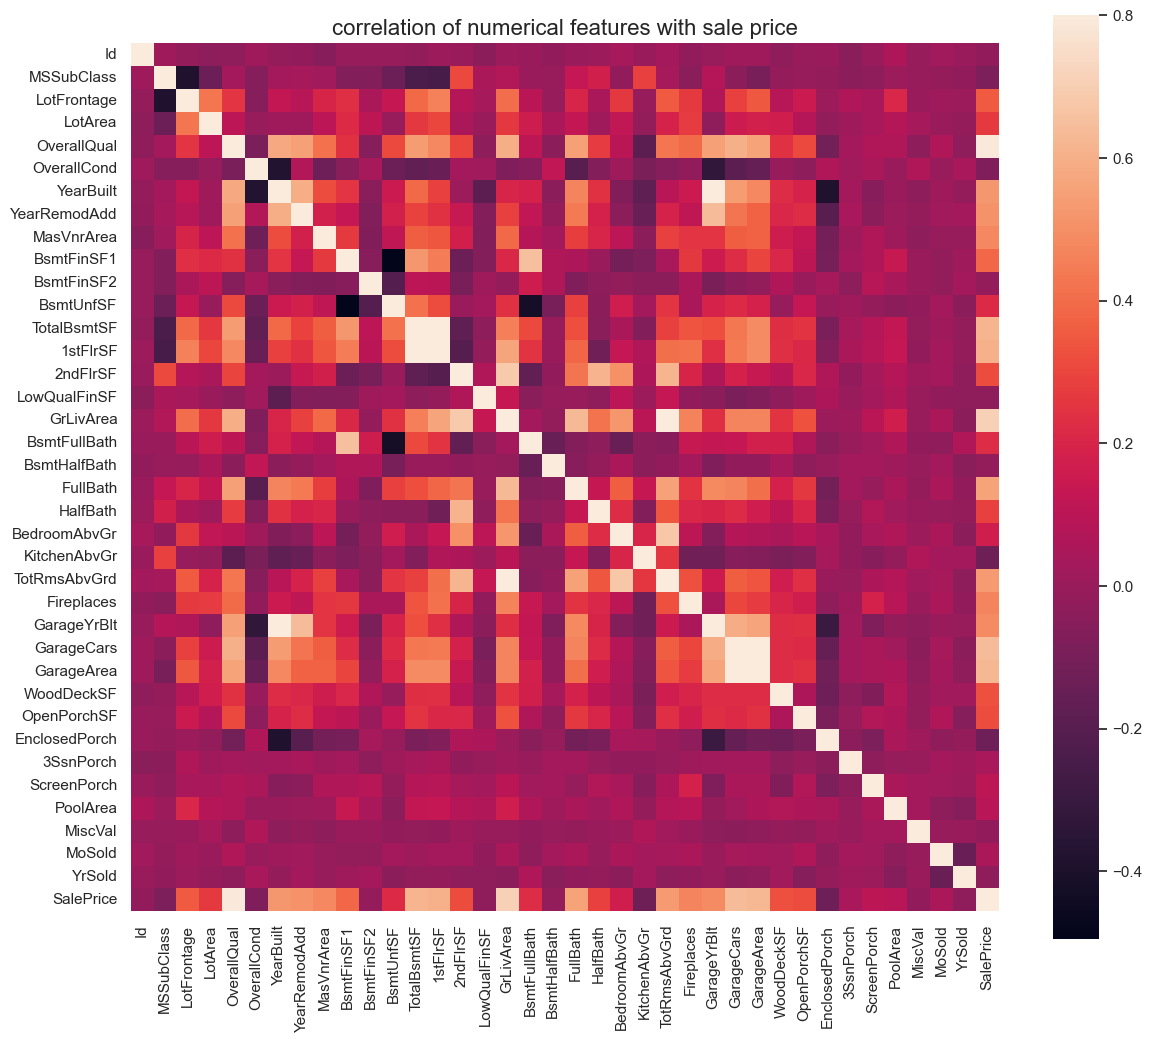

In [15]:
#heatmap
f,ax=plt.subplots(figsize=(14,12))
plt.title('correlation of numerical features with sale price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

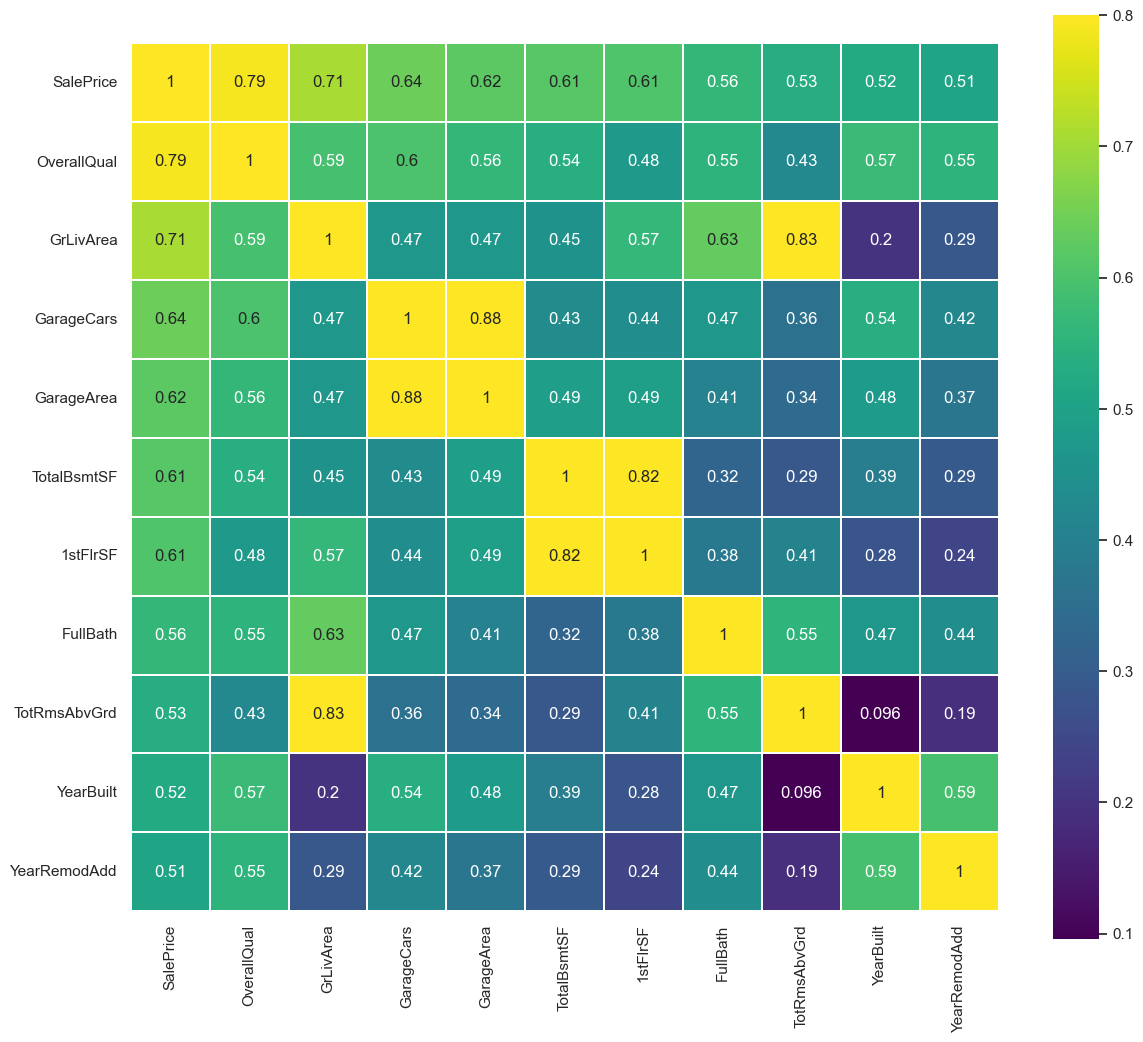

In [16]:
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm=np.corrcoef(df[cols].values.T)
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels=cols.values,annot_kws=
           {'size':12},yticklabels=cols.values)

#we have to remove multicolllineratiy which is when two features are highly correlated within themselves those kind of features 
#destroys model performance because of very low variance features which are highly related w can remove one of them 
#as in above we can see garage area and garage cars are highly correlated with each other so by seeing their correlation with 
#sales price which is highly correlated to sales price we will keep that and remove the other one

##scatterplot:A scatter plot is a twoo dimensional data visualization that uses dots to represents the value obtained for two different values obtained for two different varaibles_onr plotted along x_axis and another at y_axis


<Axes: xlabel='GarageCars', ylabel='SalePrice'>

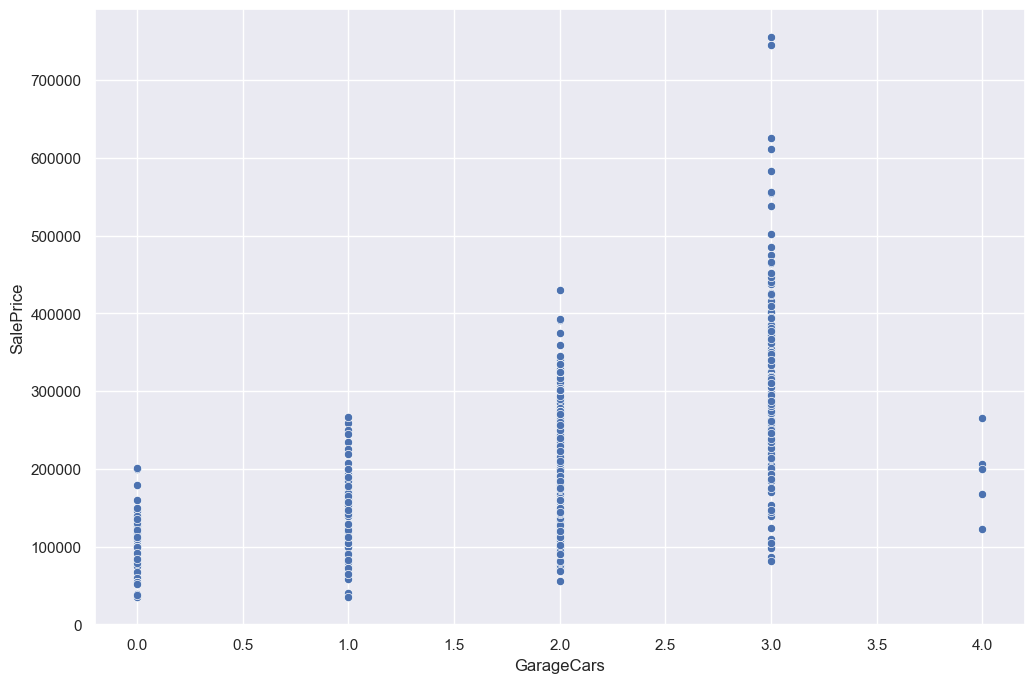

In [17]:
sns.scatterplot(x='GarageCars',y='SalePrice',data=df)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

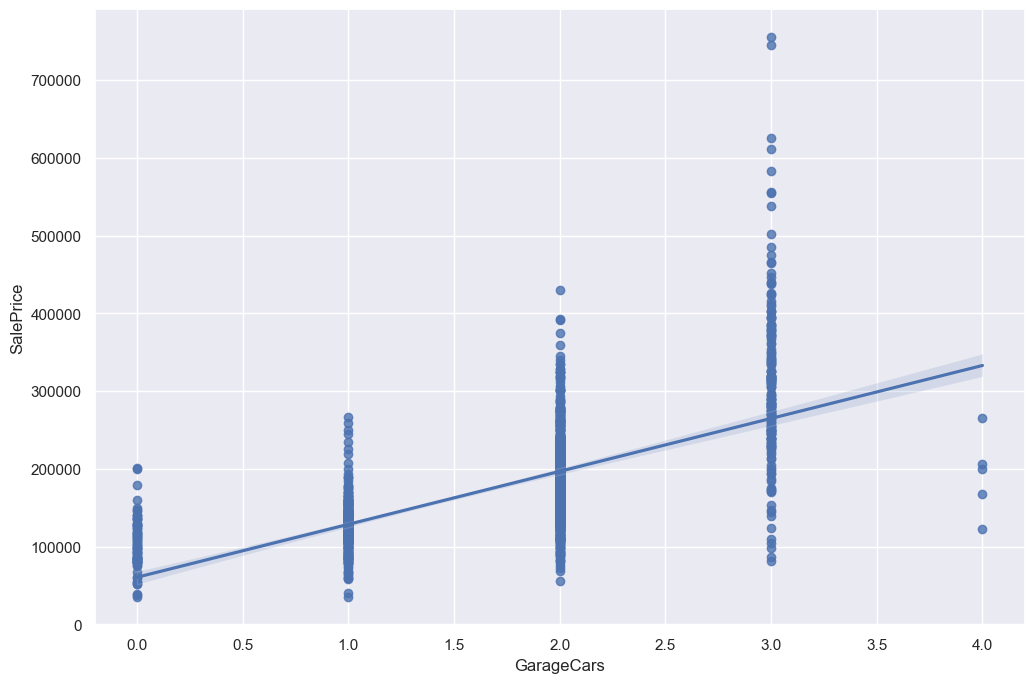

In [18]:
#we can also plot a reg plot which is quite similar to scatter plot but it gives a line that fits it

sns.regplot(x='GarageCars',y='SalePrice',data=df,scatter=True,fit_reg=True)

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

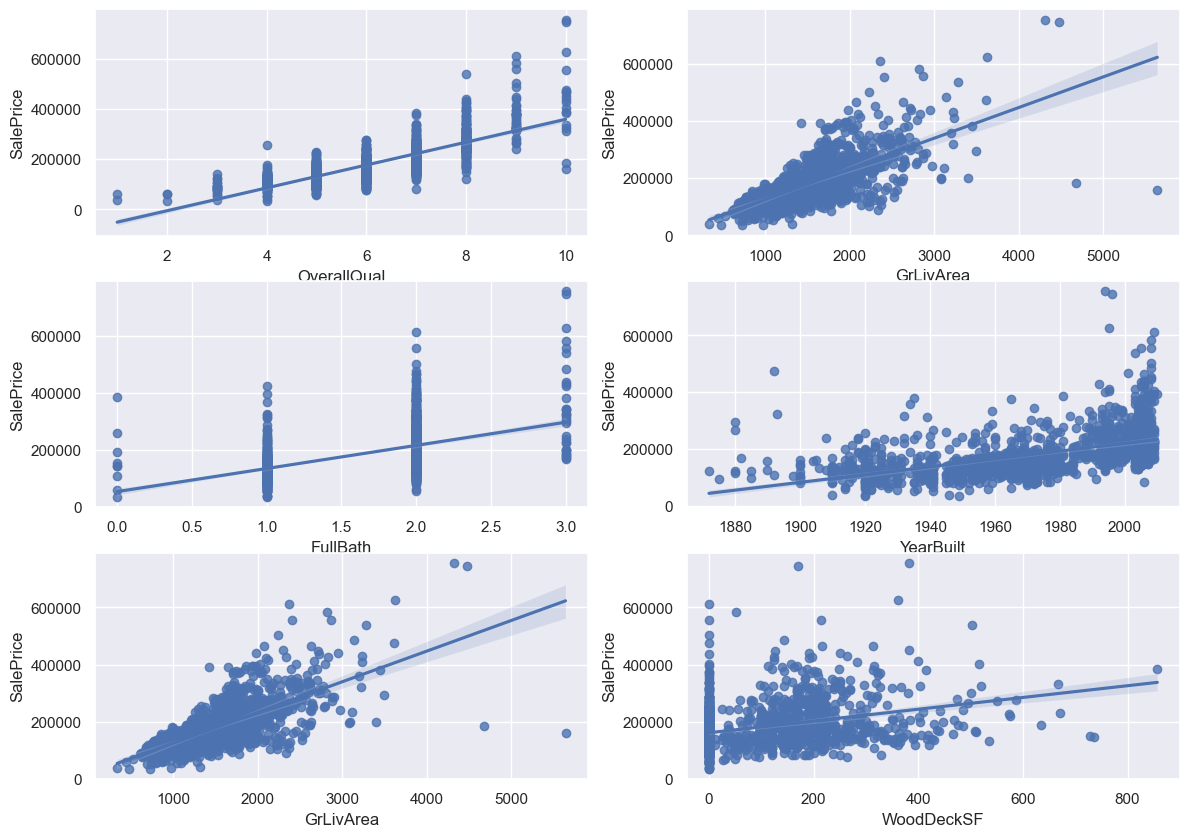

In [19]:
#scatter plots between the most crrelated variables
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(14,10))
sns.regplot(x= 'OverallQual',y='SalePrice',data=df,scatter=True,fit_reg=True,ax=ax1)
sns.regplot(x= 'GrLivArea',y='SalePrice',data=df,scatter=True,fit_reg=True,ax=ax2)
sns.regplot(x= 'FullBath',y='SalePrice',data=df,scatter=True,fit_reg=True,ax=ax3)
sns.regplot(x= 'YearBuilt',y='SalePrice',data=df,scatter=True,fit_reg=True,ax=ax4)
sns.regplot(x= 'GrLivArea',y='SalePrice',data=df,scatter=True,fit_reg=True,ax=ax5)
sns.regplot(x='WoodDeckSF',y='SalePrice',data=df,scatter=True,fit_reg=True,ax=ax6)







         

#boxplot : five number summary:sample minimum the lower quartile
the new upper whisker is the first number that is less than the upper quartile(3q)+1.5iqr
the new lower whisker is the first number that is less than the lower quartile(1q)-1.5iqr


<Axes: xlabel='SalePrice'>

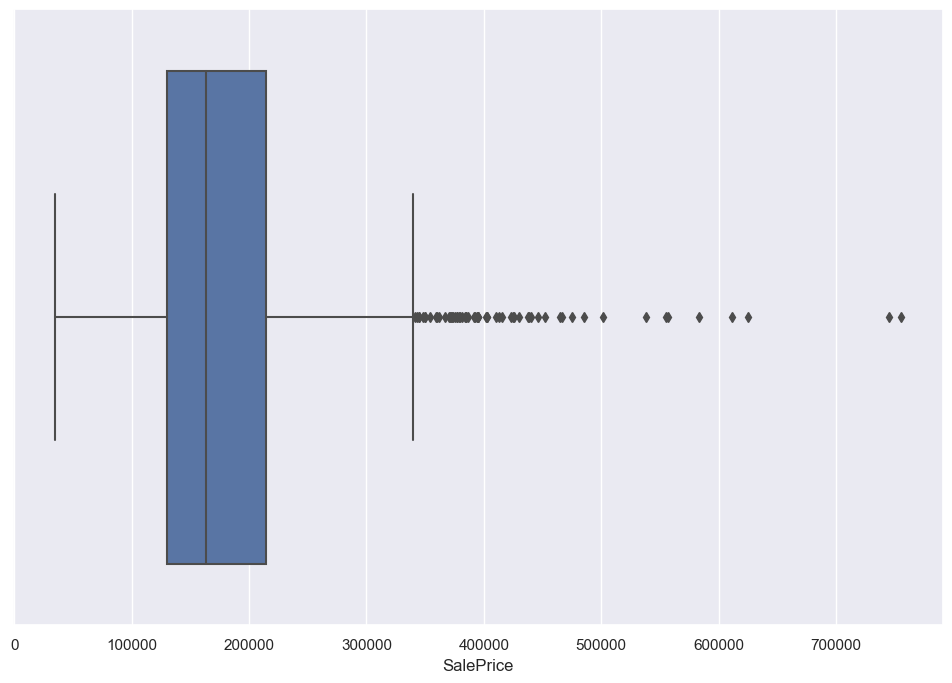

In [23]:
sns.boxplot(x=df["SalePrice"])

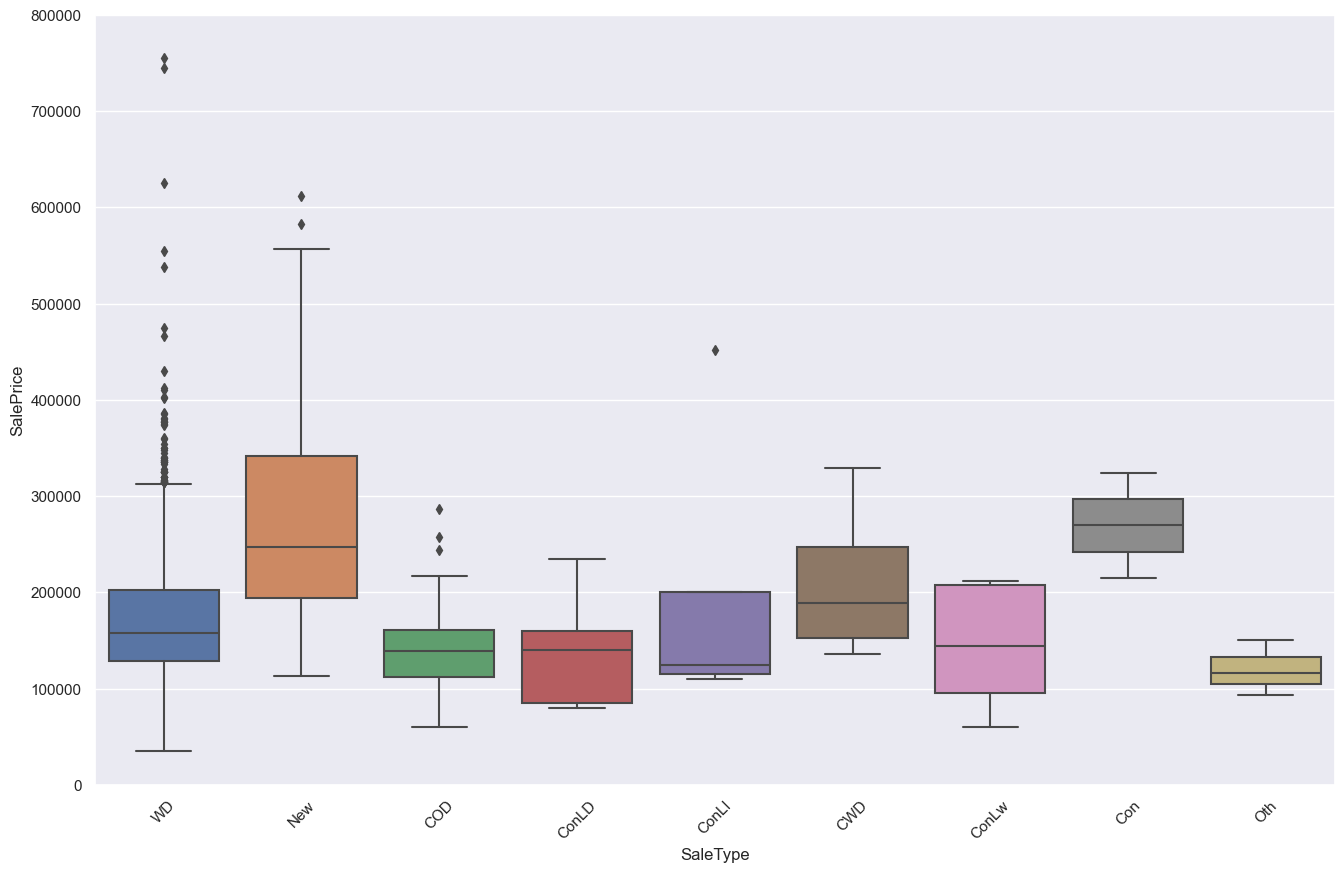

In [24]:
f,ax=plt.subplots(figsize=(16,10))
fig=sns.boxplot(x='SaleType',y="SalePrice",data=df)''
fig.axis(ymin=0,ymax=800000);
xt=plt.xticks(rotation=45)

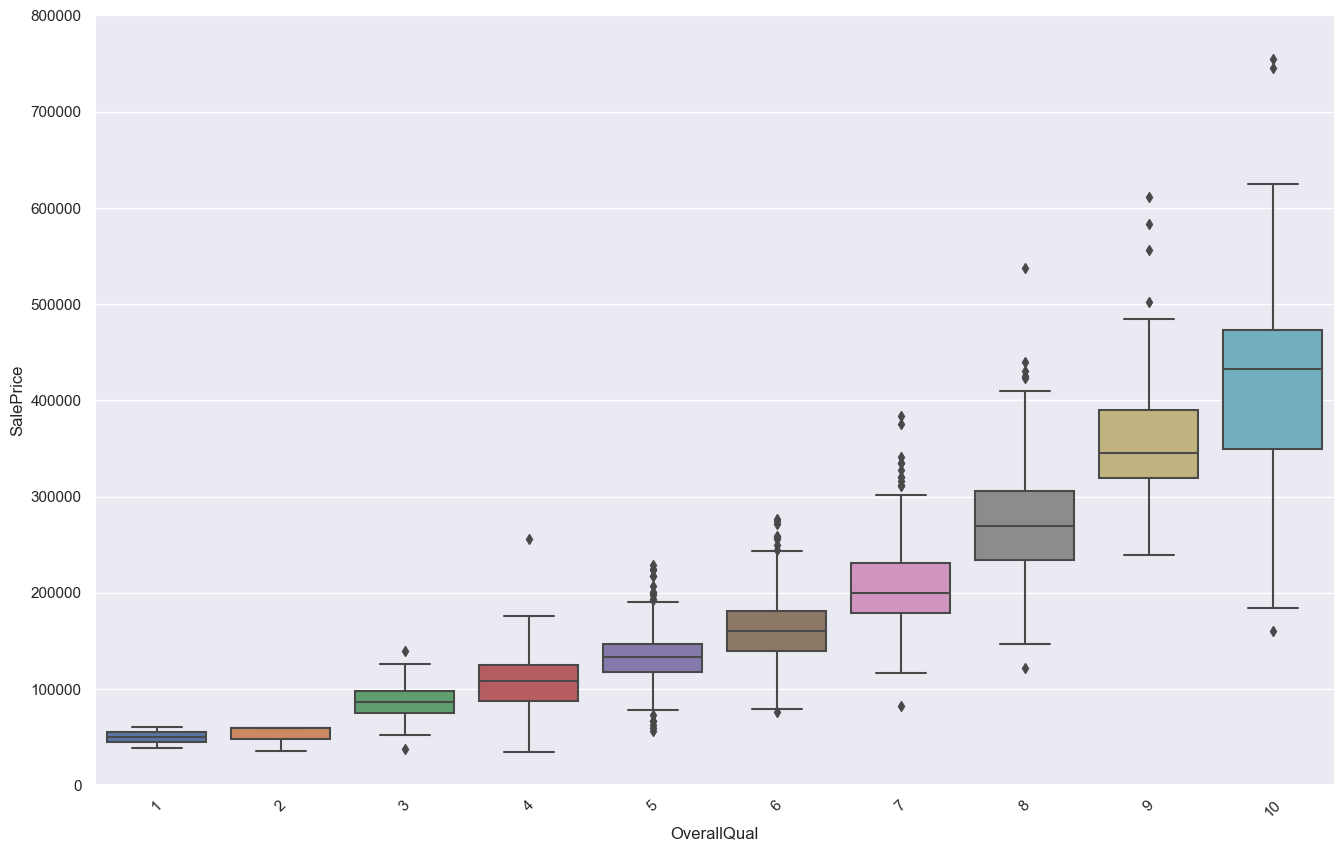

In [26]:
f,ax=plt.subplots(figsize=(16,10))
fig=sns.boxplot(x='OverallQual',y="SalePrice",data=df)
fig.axis(ymin=0,ymax=800000);
xt=plt.xticks(rotation=45)

In [27]:
#removing outliers
first_quartile=df["SalePrice"].quantile(.25)
third_quartile=df["SalePrice"].quantile(.75)
iqr=third_quartile-first_quartile


In [29]:
new_boundary=third_quartile+3*iqr

In [31]:
df.drop(df[df['SalePrice']>new_boundary].index,axis=0,inplace=True)

In [32]:
df.shape

(1448, 81)

<Axes: xlabel='SalePrice'>

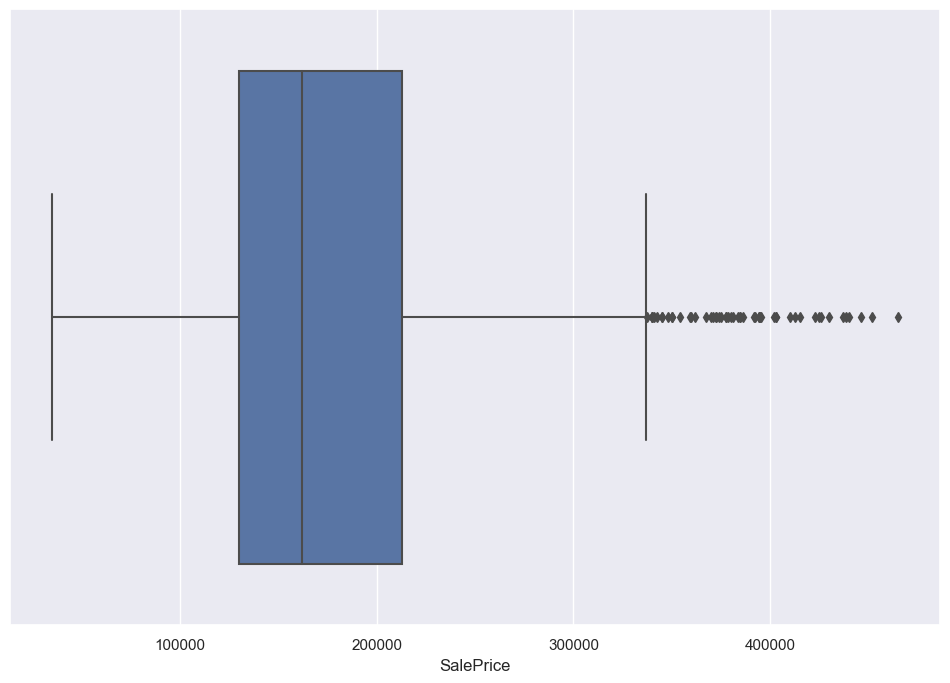

In [33]:
sns.boxplot(x=df["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

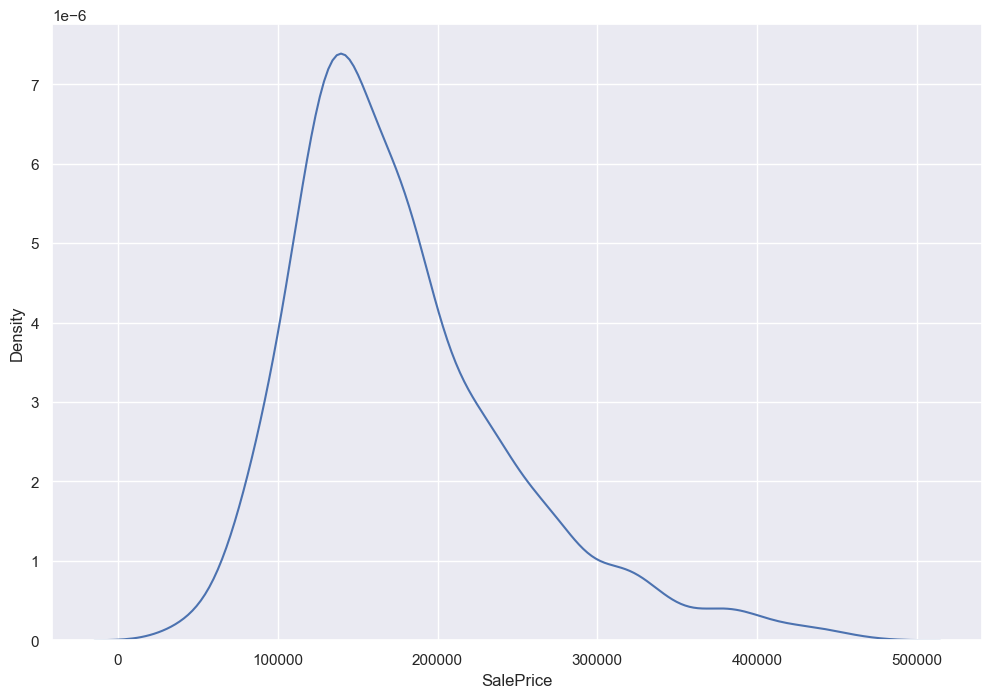

In [34]:
sns.kdeplot(df['SalePrice''SalePrice'])

In [36]:
df["SalePrice"].describe()

count      1448.000000
mean     177657.070442
std       70678.078392
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212925.000000
max      465000.000000
Name: SalePrice, dtype: float64

#removing bad features from the data
1 muticollinearity features
2.Features with missing values having more than 20% null values
3.Features which are less corelated

In [ ]:
cols_to_remove=['Id', 'MSSubClass', 'LotFrontage',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'M', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],